In [1]:
import os

In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
datasets = [i for i in os.listdir() if '.csv' in i]

In [5]:
datasets

['features.csv', 'sampleSubmission.csv', 'stores.csv', 'test.csv', 'train.csv']

In [6]:
features = pd.read_csv('./{}'.format(datasets[0]))
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
train = pd.read_csv('./{}'.format(datasets[-1]))
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [8]:
stores = pd.read_csv('./{}'.format(datasets[2]))
stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [9]:
train_stores = train.join(stores.set_index('Store'), on = ['Store'], how = "left", lsuffix = '_train', rsuffix = '_stores')

In [10]:
data = train_stores.join(features.set_index(['Store','Date']), on = ['Store','Date'], how = "left", lsuffix = '_train', rsuffix = '_features')

In [11]:
data.drop('IsHoliday_train', axis = 1, inplace = True)

In [12]:
data['week'] = data.Date.astype('datetime64').dt.week + 1
data['year'] = data.Date.astype('datetime64').dt.year

In [13]:
data = data.sort_values(by=['Date','Store','Dept'])

In [14]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_features,week,year
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,6,2010
143,1,2,2010-02-05,50605.27,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,6,2010
286,1,3,2010-02-05,13740.12,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,6,2010
429,1,4,2010-02-05,39954.04,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,6,2010
572,1,5,2010-02-05,32229.38,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,6,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421012,45,93,2012-10-26,2487.80,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,44,2012
421146,45,94,2012-10-26,5203.31,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,44,2012
421289,45,95,2012-10-26,56017.47,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,44,2012
421434,45,97,2012-10-26,6817.48,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,44,2012


In [15]:
weeks_test = data[data['year'] == 2012]['week'].unique()[-39:]

In [16]:
weeks_test

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44], dtype=int64)

In [17]:
data['sample_weights'] = data['IsHoliday_features'].apply(lambda x: 5 if x else 1)

In [18]:
test = pd.DataFrame()
for i in weeks_test:
    test = pd.concat([test,data[data['week'] == i][data['year'] == 2012]], axis = 0)
indexes = test.index
test = test.reset_index(drop = True)
test

C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_features,week,year,sample_weights
0,1,1,2012-02-03,23510.49,A,151315,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,6,2012,1
1,1,2,2012-02-03,54322.24,A,151315,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,6,2012,1
2,1,3,2012-02-03,12485.78,A,151315,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,6,2012,1
3,1,4,2012-02-03,40274.83,A,151315,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,6,2012,1
4,1,5,2012-02-03,28307.43,A,151315,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,6,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115583,45,93,2012-10-26,2487.80,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,44,2012,1
115584,45,94,2012-10-26,5203.31,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,44,2012,1
115585,45,95,2012-10-26,56017.47,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,44,2012,1
115586,45,97,2012-10-26,6817.48,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,44,2012,1


In [19]:
train = data.drop(index=indexes)
train = train.reset_index(drop = True)

In [20]:
## 1st task

In [21]:
train_1a = train.copy()
train_1b = train.copy()

In [22]:
train_1a['month'] = train_1a.Date.astype('datetime64').dt.month

In [23]:
train_1a.groupby(by=['year', 'month', 'Store'])['Weekly_Sales'].sum()[2011][9].sort_values('index', ascending = False)

Store
4     10208029.69
20    10005245.96
14     9499817.19
13     9432867.60
2      8568254.09
10     8393679.31
27     8242797.21
1      7379542.34
19     7173430.32
6      6960197.58
39     6917370.12
31     6759042.64
23     6705595.42
24     6429715.70
11     6244339.35
28     6168008.27
41     6095507.14
32     5627938.32
26     4944408.06
17     4824123.56
22     4707766.86
40     4658793.12
12     4602286.44
34     4558911.97
8      4226210.71
18     4038609.17
35     3930198.70
45     3597072.27
21     3346957.06
25     3261794.11
43     3003522.11
15     2868673.70
7      2789496.99
42     2761083.03
16     2649441.26
9      2589013.04
37     2582942.55
29     2398834.61
38     1984399.19
30     1902373.49
3      1862692.56
36     1683660.55
44     1516495.93
5      1498625.82
33     1247973.31
Name: Weekly_Sales, dtype: float64

In [24]:
train_1a.groupby(by=['year', 'month', 'Store'])['Weekly_Sales'].sum()[2011][1].sort_values('index')

Store
33     979488.91
5     1101385.70
44    1133348.94
38    1441138.57
3     1475045.38
36    1566522.75
29    1738418.56
30    1781607.59
9     1866651.64
16    1955191.67
15    1957495.60
37    2108240.10
42    2239343.31
7     2243460.47
25    2299697.72
43    2390299.74
21    2593761.21
45    2595766.21
35    2630152.38
40    3205520.99
8     3287636.78
17    3333721.56
22    3335860.39
26    3377790.85
12    3397346.60
18    3451824.98
34    3527000.41
32    4159786.44
41    4320671.42
23    4333154.25
24    4580473.64
11    4661550.10
28    4708717.88
39    4819743.69
19    4902533.85
6     5204924.11
31    5261839.99
1     5480050.97
27    6038609.55
10    6818438.72
13    6830701.19
14    6920749.25
2     6949000.95
20    7270688.30
4     7428613.52
Name: Weekly_Sales, dtype: float64

In [25]:
train_1a.groupby(by=['year','month', 'Store'])['Weekly_Sales'].sum()[2010][3].sort_values('index', ascending = False).index[0]

14

In [26]:
train_1a.groupby(by=['year','month', 'Store'])['Weekly_Sales'].sum()[2011][3].sort_values('index', ascending = False).index[0]

4

In [27]:
train_1a.groupby(by=['year','month', 'Store'])['Weekly_Sales'].sum()[2012]

month  Store
1      1        5723690.52
       2        6916920.87
       3        1480953.54
       4        7923260.95
       5        1187031.43
       6        5381449.24
       7        2426033.95
       8        3281908.34
       9        1957131.52
       10       6702933.45
       11       4918601.28
       12       3555417.84
       13       7206304.72
       14       6939868.82
       15       1929038.55
       16       2001427.10
       17       3650476.16
       18       3630523.31
       19       4965497.09
       20       7530005.03
       21       2533800.02
       22       3434282.44
       23       4366582.41
       24       4616460.35
       25       2435482.61
       26       3466674.66
       27       5833352.44
       28       4889725.32
       29       1757380.77
       30       1775853.05
       31       5411164.02
       32       4303412.25
       33       1028324.99
       34       3650949.39
       35       2555416.23
       36       1287816.31
       37      

In [28]:
## b task

In [29]:
gb_1b = train_1b.groupby(by=['Dept','IsHoliday_features'])['Weekly_Sales'].mean().unstack()

In [30]:
gb_1b['diff'] = gb_1b[1]/gb_1b[0] * 100
list200 = list(gb_1b[gb_1b['diff'] >= 200].index)
list200

[72, 77, 99]

In [31]:
gb_1b['diff'] = gb_1b[1]/gb_1b[0] * 100
list50 = list(gb_1b[gb_1b['diff'] <= 50].index)
list50

[16, 43, 47, 56]

In [32]:
def Department_Type(x):
    if x in list50:
        return 1
    elif x in list200:
        return 3
    else:
        return 2

In [33]:
train['Department_Type'] = train['Dept'].apply(lambda x: Department_Type(x))
train['Department_Type']

0         2
1         2
2         2
3         2
4         2
         ..
305977    2
305978    2
305979    2
305980    2
305981    2
Name: Department_Type, Length: 305982, dtype: int64

In [103]:
train.groupby(by=['Dept','Department_Type']).count().reset_index()[['Dept','Department_Type']]['Department_Type'].value_counts()

2    74
1     4
3     3
Name: Department_Type, dtype: int64

In [106]:
round(train.groupby(by=['Store', 'Size']).sum()['Weekly_Sales'].reset_index()[['Size', 'Weekly_Sales']].corr(), 3)

,Size,Weekly_Sales
Size,1.000,0.844
Weekly_Sales,0.844,1.000


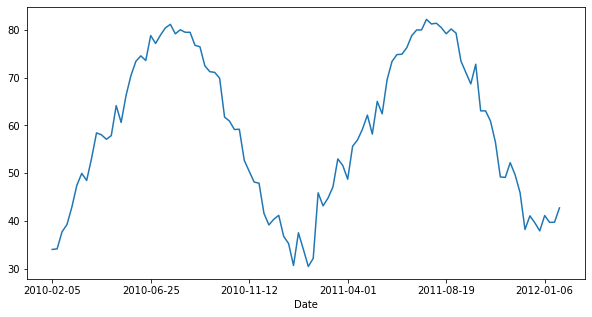

In [35]:
plt.figure(figsize=(10,5))
train.groupby(by=['Date','Store','Temperature']).sum().reset_index()[['Date','Store','Temperature']].groupby(by='Date').mean().Temperature.plot().get_figure().savefig('3.png')

In [36]:
## 2b
t2b = train.groupby(['Store','Size'])[['Weekly_Sales']].sum().reset_index()
t2b.head(5)

,Store,Size,Weekly_Sales
0,1,151315,1.599244e+08
1,2,202307,2.008027e+08
2,3,37392,4.104325e+07
3,4,205863,2.146960e+08
4,5,34875,3.249388e+07


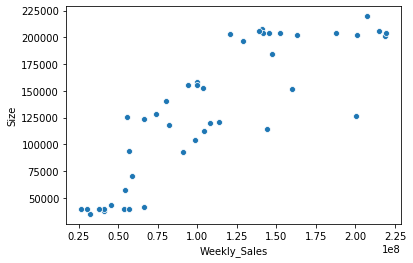

In [37]:
sns.scatterplot(data = t2b, x = 'Weekly_Sales', y = 'Size')

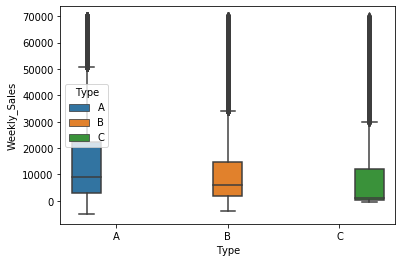

In [38]:
sns.boxplot(data = train[train['Weekly_Sales'] <= 70000], x = 'Type', y = 'Weekly_Sales', hue = 'Type', orient = 'v')

In [39]:
train[train['Type'] == 'B']

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_features,week,year,sample_weights,Department_Type
146,3,1,2010-02-05,6453.58,B,37392,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,False,6,2010,1,2
147,3,2,2010-02-05,17566.72,B,37392,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,False,6,2010,1,2
148,3,3,2010-02-05,4710.29,B,37392,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,False,6,2010,1,2
149,3,4,2010-02-05,8495.10,B,37392,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,False,6,2010,1,2
150,3,5,2010-02-05,15051.48,B,37392,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,False,6,2010,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305977,45,93,2012-01-27,1397.34,B,118221,37.93,3.567,1890.49,2618.49,NaN,139.07,5692.74,189.516850,8.424,False,5,2012,1,2
305978,45,94,2012-01-27,3904.32,B,118221,37.93,3.567,1890.49,2618.49,NaN,139.07,5692.74,189.516850,8.424,False,5,2012,1,2
305979,45,95,2012-01-27,44521.65,B,118221,37.93,3.567,1890.49,2618.49,NaN,139.07,5692.74,189.516850,8.424,False,5,2012,1,2
305980,45,97,2012-01-27,5724.94,B,118221,37.93,3.567,1890.49,2618.49,NaN,139.07,5692.74,189.516850,8.424,False,5,2012,1,2


In [40]:
q = train.groupby(['Store','Type'])['Weekly_Sales'].sum().reset_index().query('Type == "A"')['Weekly_Sales'].quantile(0.8)

In [41]:
t2d = train.groupby(['Store','Type'])['Weekly_Sales'].sum().reset_index().set_index('Store').query('Type == "B"')['Weekly_Sales']

In [42]:
t2d[t2d.values > q]

Store
10    200092030.4
Name: Weekly_Sales, dtype: float64

In [43]:
ws = train.groupby('Store')['Weekly_Sales'].sum()

q1 = ws.quantile(0.2)
q2 = ws.quantile(0.4)
q3 = ws.quantile(0.6)
q4 = ws.quantile(0.8)
q5 = ws.quantile(1)

def Total_Sales_Store_Type(x):
    if x >= 0 and x < q1:
        return 1
    elif q1 <= x and x < q2:
        return 2
    elif q2 <= x and x < q3:
        return 3
    elif q3 <= x and x < q4:
        return 4
    elif q4 <= x and x <= q5:
        return 5

In [44]:
ws = ws.reset_index().set_index('Store')

In [45]:
ws['Total_Sales_Store_Type'] = ws['Weekly_Sales'].apply(lambda x: Total_Sales_Store_Type(x))

In [46]:
ws['Total_Sales_Store_Type'].head(5)

Store
1    5
2    5
3    1
4    5
5    1
Name: Total_Sales_Store_Type, dtype: int64

In [47]:
train = train.join(ws, on = 'Store', rsuffix = '_ws', how = 'left').drop('Weekly_Sales_ws', axis = 1)

In [48]:
ws['Total_Sales_Store_Type'].value_counts()

5    9
4    9
3    9
2    9
1    9
Name: Total_Sales_Store_Type, dtype: int64

In [49]:
train

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_features,week,year,sample_weights,Department_Type,Total_Sales_Store_Type
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,NaN,NaN,...,NaN,NaN,211.096358,8.106,False,6,2010,1,2,5
1,1,2,2010-02-05,50605.27,A,151315,42.31,2.572,NaN,NaN,...,NaN,NaN,211.096358,8.106,False,6,2010,1,2,5
2,1,3,2010-02-05,13740.12,A,151315,42.31,2.572,NaN,NaN,...,NaN,NaN,211.096358,8.106,False,6,2010,1,2,5
3,1,4,2010-02-05,39954.04,A,151315,42.31,2.572,NaN,NaN,...,NaN,NaN,211.096358,8.106,False,6,2010,1,2,5
4,1,5,2010-02-05,32229.38,A,151315,42.31,2.572,NaN,NaN,...,NaN,NaN,211.096358,8.106,False,6,2010,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305977,45,93,2012-01-27,1397.34,B,118221,37.93,3.567,1890.49,2618.49,...,139.07,5692.74,189.516850,8.424,False,5,2012,1,2,2
305978,45,94,2012-01-27,3904.32,B,118221,37.93,3.567,1890.49,2618.49,...,139.07,5692.74,189.516850,8.424,False,5,2012,1,2,2
305979,45,95,2012-01-27,44521.65,B,118221,37.93,3.567,1890.49,2618.49,...,139.07,5692.74,189.516850,8.424,False,5,2012,1,2,2
305980,45,97,2012-01-27,5724.94,B,118221,37.93,3.567,1890.49,2618.49,...,139.07,5692.74,189.516850,8.424,False,5,2012,1,2,2


In [50]:
## 3rd
# a
t3a =  train.groupby(['Date','IsHoliday_features'])['Weekly_Sales'].sum().reset_index()
t3a[t3a['IsHoliday_features'] == True].count()[0]

8

In [51]:
te3a =  test.groupby(['Date','IsHoliday_features'])['Weekly_Sales'].sum().reset_index()
te3a[te3a['IsHoliday_features'] == True].count()[0]

2

In [52]:
# b
Is_SuperBowl_list = ['2010-02-12', '2011-02-11', '2012-02-10','2013-02-08']
Is_BlackFriday_list = ['2010-11-23','2011-11-25','2012-11-23','2013-09-06']
Is_Christmas_list = ['2010-12-31', '2011-12-30', '2012-12-28','2013-12-27']
 
def Is_SuperBowl(x):
    if str(x) in Is_SuperBowl_list:
        return 1
    else:
        return 0
    
def Is_BlackFriday(x):
    if x in Is_BlackFriday_list:
        return 1
    else:
        return 0
    
def Is_Christmas(x):
    if x in Is_Christmas_list:
        return 1
    else:
        return 0

In [53]:
train['Is_SuperBowl'] = train['Date'].apply(lambda x: Is_SuperBowl(x))
train['Is_BlackFriday'] = train['Date'].apply(lambda x: Is_BlackFriday(x))
train['Is_Christmas'] = train['Date'].apply(lambda x: Is_Christmas(x))
train

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday_features,week,year,sample_weights,Department_Type,Total_Sales_Store_Type,Is_SuperBowl,Is_BlackFriday,Is_Christmas
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,NaN,NaN,...,8.106,False,6,2010,1,2,5,0,0,0
1,1,2,2010-02-05,50605.27,A,151315,42.31,2.572,NaN,NaN,...,8.106,False,6,2010,1,2,5,0,0,0
2,1,3,2010-02-05,13740.12,A,151315,42.31,2.572,NaN,NaN,...,8.106,False,6,2010,1,2,5,0,0,0
3,1,4,2010-02-05,39954.04,A,151315,42.31,2.572,NaN,NaN,...,8.106,False,6,2010,1,2,5,0,0,0
4,1,5,2010-02-05,32229.38,A,151315,42.31,2.572,NaN,NaN,...,8.106,False,6,2010,1,2,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305977,45,93,2012-01-27,1397.34,B,118221,37.93,3.567,1890.49,2618.49,...,8.424,False,5,2012,1,2,2,0,0,0
305978,45,94,2012-01-27,3904.32,B,118221,37.93,3.567,1890.49,2618.49,...,8.424,False,5,2012,1,2,2,0,0,0
305979,45,95,2012-01-27,44521.65,B,118221,37.93,3.567,1890.49,2618.49,...,8.424,False,5,2012,1,2,2,0,0,0
305980,45,97,2012-01-27,5724.94,B,118221,37.93,3.567,1890.49,2618.49,...,8.424,False,5,2012,1,2,2,0,0,0


In [54]:
train['Other_holidays'] = train.apply(lambda x: 1 if ((x['Is_SuperBowl'] + x['Is_BlackFriday'] + x['Is_Christmas']) == 0) and (x['IsHoliday_features'] == True) else 0, axis = 1)

In [55]:
train['Regular_weeks'] = train.apply(lambda x: 1 if not x['IsHoliday_features'] else 0, axis = 1)

In [56]:
train['Other_holidays'].sum()

8833

In [57]:
sum_stores = sum(train[train['year'] == 2011].groupby('Store').Weekly_Sales.sum().nlargest(10))
temp_index = train[train['year'] == 2011].groupby('Store').Weekly_Sales.sum().nlargest(10).index
#train.nlargest(10, 'Weekly_Sales')

sum_Is_BlackFriday = sum(train[train['year'] == 2011][train['Is_BlackFriday'] == 1].groupby(['Store'])['Weekly_Sales'].sum()[temp_index])

sum_Is_Christmas = sum(train[train['year'] == 2011][train['Is_Christmas'] == 1].groupby(['Store'])['Weekly_Sales'].sum()[temp_index])

sum_Is_SuperBowl = sum(train[train['year'] == 2011][train['Is_SuperBowl'] == 1].groupby(['Store'])['Weekly_Sales'].sum()[temp_index])

print(sum_Is_BlackFriday / sum_stores * 100)

print(sum_Is_Christmas / sum_stores * 100)

print(sum_Is_SuperBowl / sum_stores * 100)

2.7290925366029044
1.8807170485060365
1.941914953935114


C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [58]:
sum_stores = sum(train[train['year'] == 2011].groupby('Store').Weekly_Sales.sum().nsmallest(10))
temp_index = train[train['year'] == 2011].groupby('Store').Weekly_Sales.sum().nsmallest(10).index
#train.nlargest(10, 'Weekly_Sales')

sum_Is_BlackFriday = sum(train[train['year'] == 2011][train['Is_BlackFriday'] == 1].groupby(['Store'])['Weekly_Sales'].sum()[temp_index])

sum_Is_Christmas = sum(train[train['year'] == 2011][train['Is_Christmas'] == 1].groupby(['Store'])['Weekly_Sales'].sum()[temp_index])

sum_Is_SuperBowl = sum(train[train['year'] == 2011][train['Is_SuperBowl'] == 1].groupby(['Store'])['Weekly_Sales'].sum()[temp_index])

print(sum_Is_BlackFriday / sum_stores * 100)

print(sum_Is_Christmas / sum_stores * 100)

print(sum_Is_SuperBowl / sum_stores * 100)

C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


2.368352645435298
1.8707112157599528
1.966437811980674


C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [59]:
## 4 tast

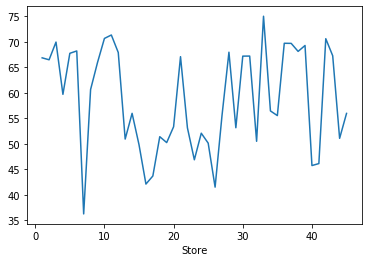

In [60]:
train.groupby('Store').Temperature.mean().plot()

In [61]:
t4b = train.groupby(['Date','Store','Temperature'])['Weekly_Sales'].sum().reset_index()

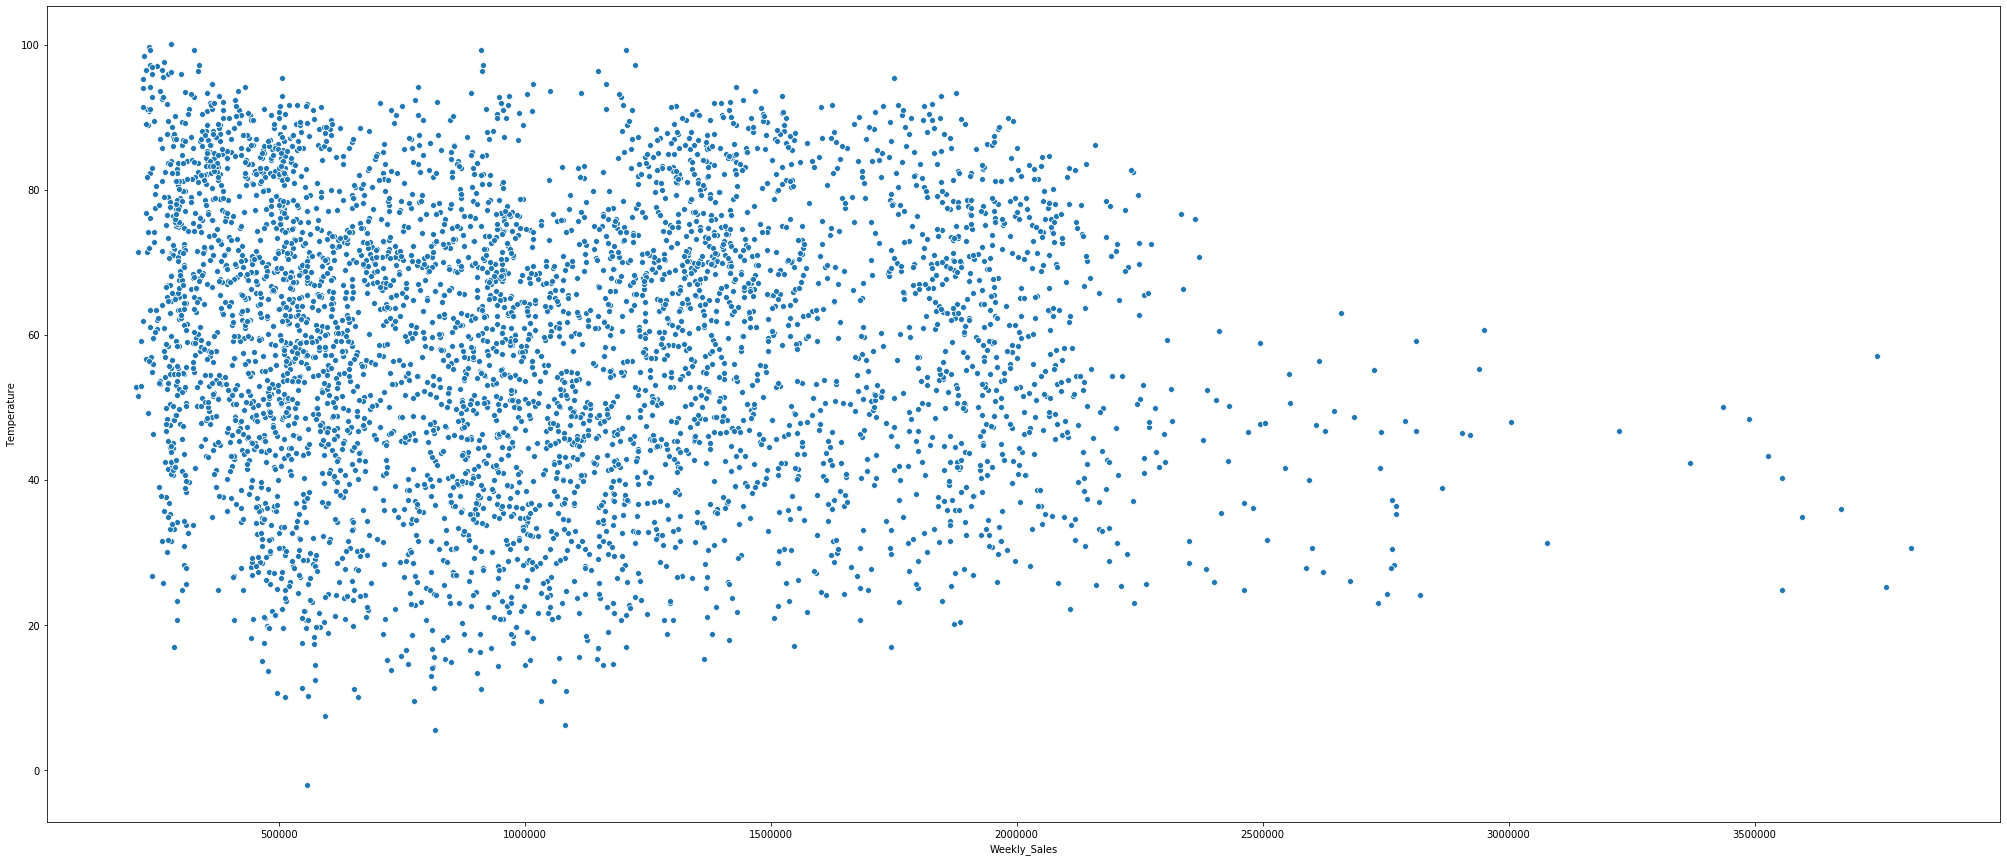

In [62]:
plt.figure(figsize = (35,15))
sns.scatterplot(data = t4b[['Temperature','Weekly_Sales']], x = 'Weekly_Sales', y = 'Temperature')

In [63]:
round(t4b.corr(method = 'pearson'), 3)

,Store,Temperature,Weekly_Sales
Store,1.000,-0.022,-0.332
Temperature,-0.022,1.000,-0.069
Weekly_Sales,-0.332,-0.069,1.000


In [64]:
t4c = train[(train['year'] == 2010)&(train['Date'].astype('datetime64[ns]').dt.month == 7)].groupby('Store').agg({min, max}).Temperature.reset_index()

In [65]:
t4c['diff'] = t4c['max'] - t4c['min']
t4c.nlargest(2, 'diff')
t4c.nlargest(2, 'diff').Store

22    23
25    26
Name: Store, dtype: int64

In [66]:
t4d = train.groupby(['Store','Temperature']).Weekly_Sales.sum().reset_index().drop('Weekly_Sales', axis = 1).set_index('Store').loc[[23,26],:]

In [67]:
t4d = t4d.reset_index()

In [68]:
t4d

,Store,Temperature
0,23,10.91
1,23,14.50
2,23,15.25
3,23,15.33
4,23,15.58
...,...,...
201,26,65.40
202,26,66.93
203,26,67.66
204,26,69.52


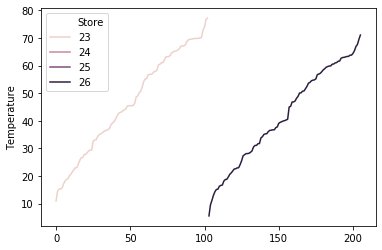

In [69]:
sns.lineplot(data = t4d, hue = 'Store', x = t4d.index, y = 'Temperature')

In [70]:
t4e = train.groupby(['Store','Temperature'])['Weekly_Sales'].sum().reset_index().set_index('Store')

In [71]:
round(t4e.loc[[23],:].corr(), 3)

,Temperature,Weekly_Sales
Temperature,1.000,0.044
Weekly_Sales,0.044,1.000


In [72]:
round(t4e.loc[[26],:].corr(), 3)

,Temperature,Weekly_Sales
Temperature,1.000,0.058
Weekly_Sales,0.058,1.000


In [73]:
t4f = train.groupby(['Store','Date']).Temperature.mean().reset_index()

In [74]:
df_t4f = pd.DataFrame()
for i in list(t4f.Store.unique()):
    temp = t4f[t4f['Store'] == i].Temperature.rolling(4).mean()
    temp[:3] = t4f.Temperature[:3]
    print(temp)
    df_t4f = pd.concat([df_t4f, temp], axis = 0)
df_t4f.rename(columns={0:'Average_Temperature_month'}, inplace = True)    

0      42.3100
1      38.5100
2      39.9300
3      41.8450
4      42.8925
        ...   
99     47.0175
100    48.2875
101    47.5125
102    49.0500
103    51.4775
Name: Temperature, Length: 104, dtype: float64
104    42.3100
105    38.5100
106    39.9300
107    41.1175
108    42.8625
        ...   
203    45.7800
204    47.0275
205    45.9925
206    47.2525
207    48.7350
Name: Temperature, Length: 104, dtype: float64
208    42.3100
209    38.5100
210    39.9300
211    48.1900
212    50.0225
        ...   
307    52.2275
308    53.0175
309    51.4950
310    52.1925
311    54.6350
Name: Temperature, Length: 104, dtype: float64
312    42.3100
313    38.5100
314    39.9300
315    37.6025
316    37.5350
        ...   
411    35.2225
412    36.9725
413    36.4650
414    38.0075
415    38.8625
Name: Temperature, Length: 104, dtype: float64
416    42.3100
417    38.5100
418    39.9300
419    41.8375
420    44.1350
        ...   
515    48.6225
516    50.1450
517    48.7550
518    49.8350
51

In [75]:
df_t4f

,Average_Temperature_month
0,42.3100
1,38.5100
2,39.9300
3,41.8450
4,42.8925
...,...
4675,41.6400
4676,38.9675
4677,39.2800
4678,36.6750


In [76]:
t4f['Average_Temperature_month'] = df_t4f.copy()

In [77]:
t4f['Average_Temperature_month']

0       42.3100
1       38.5100
2       39.9300
3       41.8450
4       42.8925
         ...   
4675    41.6400
4676    38.9675
4677    39.2800
4678    36.6750
4679    36.7100
Name: Average_Temperature_month, Length: 4680, dtype: float64

In [78]:
t4f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      4680 non-null   int64  
 1   Date                       4680 non-null   object 
 2   Temperature                4680 non-null   float64
 3   Average_Temperature_month  4680 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 146.4+ KB


In [79]:
train = train.join(t4f.set_index(['Store','Date']), on = ['Store','Date'], how = 'left', rsuffix = '_t4f', lsuffix = '')

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305982 entries, 0 to 305981
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      305982 non-null  int64  
 1   Dept                       305982 non-null  int64  
 2   Date                       305982 non-null  object 
 3   Weekly_Sales               305982 non-null  float64
 4   Type                       305982 non-null  object 
 5   Size                       305982 non-null  int64  
 6   Temperature                305982 non-null  float64
 7   Fuel_Price                 305982 non-null  float64
 8   MarkDown1                  35550 non-null   float64
 9   MarkDown2                  31952 non-null   float64
 10  MarkDown3                  33316 non-null   float64
 11  MarkDown4                  31429 non-null   float64
 12  MarkDown5                  35844 non-null   float64
 13  CPI                        30

In [81]:
train.drop(['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Temperature','IsHoliday_features','Type', 'Temperature_t4f'],axis = 1, inplace = True)

In [82]:
train = train.drop('Date', axis = 1)

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305982 entries, 0 to 305981
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      305982 non-null  int64  
 1   Dept                       305982 non-null  int64  
 2   Weekly_Sales               305982 non-null  float64
 3   Size                       305982 non-null  int64  
 4   week                       305982 non-null  int64  
 5   year                       305982 non-null  int64  
 6   sample_weights             305982 non-null  int64  
 7   Department_Type            305982 non-null  int64  
 8   Total_Sales_Store_Type     305982 non-null  int64  
 9   Is_SuperBowl               305982 non-null  int64  
 10  Is_BlackFriday             305982 non-null  int64  
 11  Is_Christmas               305982 non-null  int64  
 12  Other_holidays             305982 non-null  int64  
 13  Regular_weeks              30

In [84]:
test['Department_Type'] = test['Dept'].apply(lambda x: Department_Type(x))

In [85]:
test = test.join(ws, on = 'Store', rsuffix = '_ws', how = 'left').drop('Weekly_Sales_ws', axis = 1)

In [86]:
test['Is_SuperBowl'] = test['Date'].apply(lambda x: Is_SuperBowl(x))
test['Is_BlackFriday'] = test['Date'].apply(lambda x: Is_BlackFriday(x))
test['Is_Christmas'] = test['Date'].apply(lambda x: Is_Christmas(x))
test['Other_holidays'] = test.apply(lambda x: 1 if ((x['Is_SuperBowl'] + x['Is_BlackFriday'] + x['Is_Christmas']) == 0) and (x['IsHoliday_features'] == True) else 0, axis = 1)
test['Regular_weeks'] = test.apply(lambda x: 1 if not x['IsHoliday_features'] else 0, axis = 1)
test

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,week,year,sample_weights,Department_Type,Total_Sales_Store_Type,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks
0,1,1,2012-02-03,23510.49,A,151315,56.55,3.360,34577.06,3579.21,...,6,2012,1,2,5,0,0,0,0,1
1,1,2,2012-02-03,54322.24,A,151315,56.55,3.360,34577.06,3579.21,...,6,2012,1,2,5,0,0,0,0,1
2,1,3,2012-02-03,12485.78,A,151315,56.55,3.360,34577.06,3579.21,...,6,2012,1,2,5,0,0,0,0,1
3,1,4,2012-02-03,40274.83,A,151315,56.55,3.360,34577.06,3579.21,...,6,2012,1,2,5,0,0,0,0,1
4,1,5,2012-02-03,28307.43,A,151315,56.55,3.360,34577.06,3579.21,...,6,2012,1,2,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115583,45,93,2012-10-26,2487.80,B,118221,58.85,3.882,4018.91,58.08,...,44,2012,1,2,2,0,0,0,0,1
115584,45,94,2012-10-26,5203.31,B,118221,58.85,3.882,4018.91,58.08,...,44,2012,1,2,2,0,0,0,0,1
115585,45,95,2012-10-26,56017.47,B,118221,58.85,3.882,4018.91,58.08,...,44,2012,1,2,2,0,0,0,0,1
115586,45,97,2012-10-26,6817.48,B,118221,58.85,3.882,4018.91,58.08,...,44,2012,1,2,2,0,0,0,0,1


In [87]:
t4f = test.groupby(['Store','Date']).Temperature.mean().reset_index()

df_t4f = pd.DataFrame()
for i in list(t4f.Store.unique()):
    temp = t4f[t4f['Store'] == i].Temperature.rolling(4).mean()
    temp[:3] = t4f.Temperature[:3]
    print(temp)
    df_t4f = pd.concat([df_t4f, temp], axis = 0)
df_t4f.rename(columns={0:'Average_Temperature_month'}, inplace = True)  

t4f['Average_Temperature_month'] = df_t4f.copy()

test = test.join(t4f.set_index(['Store','Date']), on = ['Store','Date'], how = 'left', rsuffix = '_t4f', lsuffix = '')
test

0     56.5500
1     48.0200
2     45.3200
3     51.7850
4     52.8875
5     55.5725
6     60.4275
7     62.5975
8     64.2600
9     67.1775
10    68.2600
11    68.4675
12    68.3725
13    69.6525
14    70.8275
15    71.7200
16    74.2175
17    74.8175
18    75.9500
19    78.2050
20    78.4975
21    80.2300
22    81.0475
23    80.4900
24    80.9975
25    80.4425
26    81.5775
27    83.5600
28    84.6675
29    83.4175
30    82.0125
31    81.7400
32    79.2700
33    77.3225
34    76.2200
35    72.3675
36    69.3725
37    68.8975
38    67.1675
Name: Temperature, dtype: float64
39    56.5500
40    48.0200
41    45.3200
42    50.1600
43    51.0550
44    53.5875
45    58.5525
46    60.8975
47    62.9075
48    65.7375
49    66.8375
50    67.2575
51    67.3500
52    69.4250
53    70.8725
54    72.2675
55    75.0150
56    75.4275
57    76.6325
58    78.9550
59    79.6675
60    81.6525
61    83.0300
62    82.9325
63    83.4800
64    83.4925
65    84.9975
66    87.0925
67    87.4825
68    85.1175


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,sample_weights,Department_Type,Total_Sales_Store_Type,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks,Temperature_t4f,Average_Temperature_month
0,1,1,2012-02-03,23510.49,A,151315,56.55,3.360,34577.06,3579.21,...,1,2,5,0,0,0,0,1,56.55,56.55
1,1,2,2012-02-03,54322.24,A,151315,56.55,3.360,34577.06,3579.21,...,1,2,5,0,0,0,0,1,56.55,56.55
2,1,3,2012-02-03,12485.78,A,151315,56.55,3.360,34577.06,3579.21,...,1,2,5,0,0,0,0,1,56.55,56.55
3,1,4,2012-02-03,40274.83,A,151315,56.55,3.360,34577.06,3579.21,...,1,2,5,0,0,0,0,1,56.55,56.55
4,1,5,2012-02-03,28307.43,A,151315,56.55,3.360,34577.06,3579.21,...,1,2,5,0,0,0,0,1,56.55,56.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115583,45,93,2012-10-26,2487.80,B,118221,58.85,3.882,4018.91,58.08,...,1,2,2,0,0,0,0,1,58.85,58.67
115584,45,94,2012-10-26,5203.31,B,118221,58.85,3.882,4018.91,58.08,...,1,2,2,0,0,0,0,1,58.85,58.67
115585,45,95,2012-10-26,56017.47,B,118221,58.85,3.882,4018.91,58.08,...,1,2,2,0,0,0,0,1,58.85,58.67
115586,45,97,2012-10-26,6817.48,B,118221,58.85,3.882,4018.91,58.08,...,1,2,2,0,0,0,0,1,58.85,58.67


In [88]:
test.drop(['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Temperature','IsHoliday_features','Type', 'Temperature_t4f', 'Date'],axis = 1, inplace = True)

In [89]:
test

,Store,Dept,Weekly_Sales,Size,week,year,sample_weights,Department_Type,Total_Sales_Store_Type,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks,Average_Temperature_month
0,1,1,23510.49,151315,6,2012,1,2,5,0,0,0,0,1,56.55
1,1,2,54322.24,151315,6,2012,1,2,5,0,0,0,0,1,56.55
2,1,3,12485.78,151315,6,2012,1,2,5,0,0,0,0,1,56.55
3,1,4,40274.83,151315,6,2012,1,2,5,0,0,0,0,1,56.55
4,1,5,28307.43,151315,6,2012,1,2,5,0,0,0,0,1,56.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115583,45,93,2487.80,118221,44,2012,1,2,2,0,0,0,0,1,58.67
115584,45,94,5203.31,118221,44,2012,1,2,2,0,0,0,0,1,58.67
115585,45,95,56017.47,118221,44,2012,1,2,2,0,0,0,0,1,58.67
115586,45,97,6817.48,118221,44,2012,1,2,2,0,0,0,0,1,58.67


In [90]:
train

,Store,Dept,Weekly_Sales,Size,week,year,sample_weights,Department_Type,Total_Sales_Store_Type,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks,Average_Temperature_month
0,1,1,24924.50,151315,6,2010,1,2,5,0,0,0,0,1,42.31
1,1,2,50605.27,151315,6,2010,1,2,5,0,0,0,0,1,42.31
2,1,3,13740.12,151315,6,2010,1,2,5,0,0,0,0,1,42.31
3,1,4,39954.04,151315,6,2010,1,2,5,0,0,0,0,1,42.31
4,1,5,32229.38,151315,6,2010,1,2,5,0,0,0,0,1,42.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305977,45,93,1397.34,118221,5,2012,1,2,2,0,0,0,0,1,36.71
305978,45,94,3904.32,118221,5,2012,1,2,2,0,0,0,0,1,36.71
305979,45,95,44521.65,118221,5,2012,1,2,2,0,0,0,0,1,36.71
305980,45,97,5724.94,118221,5,2012,1,2,2,0,0,0,0,1,36.71


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [107]:
X_train = train.drop('Weekly_Sales' ,axis = 1)
y_train = train['Weekly_Sales']
X_valid = test.drop('Weekly_Sales' ,axis = 1)
y_valid = test['Weekly_Sales']

model = RandomForestRegressor(max_depth = 10, n_estimators = 10)
model.fit(X_train, y_train)
print('test set:', mean_absolute_error(model.predict(X_valid), y_valid))
print('train set:', mean_absolute_error(model.predict(X_train), y_train))

test set: 4144.703035463735
train set: 4275.57771344322


In [93]:
from sklearn.model_selection import GridSearchCV

In [96]:
parameters = {'n_estimators':[i for i in range(5,50,2)], 'max_depth':[i for i in range(2,20)], 'max_features':[i for i in np.arange(0.1,1,0.1)]}
gs = GridSearchCV(model, parameters, n_jobs = -1, scoring = 'neg_mean_absolute_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=10,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, rand...
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,


In [97]:
sorted(gs.cv_results_.keys())
print(gs.best_params_)

{'max_depth': 19, 'max_features': 0.9, 'n_estimators': 45}


In [108]:
X_train = train.drop('Weekly_Sales' ,axis = 1)
y_train = train['Weekly_Sales']
X_valid = test.drop('Weekly_Sales' ,axis = 1)
y_valid = test['Weekly_Sales']

model = RandomForestRegressor(max_depth = 19, n_estimators = 45,max_features = 0.9, n_jobs = -1)
model.fit(X_train, y_train)
print('test set:', mean_absolute_error(model.predict(X_valid), y_valid))
print('train set:', mean_absolute_error(model.predict(X_train), y_train))

test set: 1709.8845427722251
train set: 926.2567321704672
